<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/325_Transcriptomics_Unveiled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/IPePGXrSZHE

# **Transcriptomics Unveiled** 
## An In-Depth Exploration of Single Cell RNASeq Analysis

Dataset from: https://cell2location.cog.sanger.ac.uk/tutorial/mouse_brain_visium_wo_cloupe_data.zip

We will be primarily using Scanpy which is an open-source Python library for single-cell RNA sequencing (scRNA-seq) analysis. It provides a comprehensive toolkit for quality control, visualization, preprocessing, clustering, differential expression analysis, trajectory inference, and other common tasks in scRNA-seq data analysis.

In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=5faafcaaa841751adc11758b7352b23f440a79f4b212bfec12c2b497133427fe
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=cef1f9a5b007ecc1dc


We may also find the need to use Anndata library, short for "AnnData" (Annotated Data), which is a widely used data structure in the field of single-cell RNA sequencing (scRNA-seq) analysis. It is part of the Scanpy library and provides a flexible and efficient way to store, manipulate, and analyze scRNA-seq data.

Anndata is designed to organize and integrate diverse types of genomic data associated with individual cells. It consists of two main components:

Data matrices: Anndata stores the gene expression data in a matrix-like format. The matrix represents the expression levels of genes across individual cells. By convention, the rows of the matrix correspond to genes (features), and the columns correspond to cells (observations).

Annotations: Anndata allows the annotation of cells and features with additional metadata. This metadata can include cell type annotations, experimental conditions, sample information, gene symbols, genomic coordinates, and any other relevant attributes.

Anndata provides a unified framework for storing scRNA-seq data and associated annotations, making it easier to perform various data manipulations and analyses. It offers a rich set of functionalities, including data filtering, normalization, dimensionality reduction, clustering, differential expression analysis, visualization, and more.

Anndata objects can be created from various data sources, such as raw count matrices, sparse matrices, CSV files, or by importing data from other formats like 10x Genomics' Cell Ranger output.

In [ ]:
!pip install anndata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Load data**
<br>
We will be using Visum data, as 10X made it easy for us to access their amazing datasets. <br>
10x Visium is a spatial transcriptomics technology developed by 10x Genomics. It allows for the simultaneous profiling of gene expression and spatial information within intact tissue sections. By preserving the spatial context of gene expression, Visium enables researchers to study the spatial organization of cells and molecular interactions within complex tissues.

The Visium technology utilizes a spatially barcoded array, called a Visium Slide, which consists of a glass slide with an array of capture areas. Each capture area contains spatial barcodes and oligonucleotide probes that capture and amplify the RNA molecules within that region. The captured RNA molecules are then sequenced to obtain gene expression profiles for each spatial location.

The workflow of 10x Visium typically involves the following steps:

Sample preparation: Tissue sections are prepared on the Visium Slide, and the RNA molecules within each section are crosslinked and preserved. The tissue can be fresh-frozen or formalin-fixed paraffin-embedded (FFPE).

Spatial capture: The Visium Slide is loaded onto a 10x Genomics instrument, and reverse transcription and spatially barcoded capture of RNA molecules occur within each capture area. The spatial barcodes allow the assignment of each RNA molecule to its corresponding spatial location.

Library preparation: The captured RNA molecules are amplified, and a sequencing library is prepared. The library contains both gene expression information and spatial barcodes.

Sequencing: The library is sequenced using high-throughput sequencing technologies, generating readouts for both gene expression and spatial barcodes.

Data analysis: The sequenced data is then processed and analyzed using bioinformatics tools, such as the Scanpy package, to explore gene expression patterns, identify cell types, visualize spatial relationships, and extract biological insights from the spatially resolved transcriptomic data.

<p>

**Dataset** 
<br>
For Visium spatial transcriptomics data, you may find two directories, one for raw and the other for filtered, typically refers to the different stages of data processing specific to the Visium technology.

**Raw data directory:**

The raw data directory for Visium contains the original, unprocessed sequencing data generated by the Visium platform. It includes the raw sequencing files, such as FASTQ files, which contain the raw reads obtained from the Visium spatial transcriptomics experiment.
<br>
These raw sequencing files capture the spatially resolved gene expression information for each spot on the tissue section.

**Filtered data directory:**

The filtered data directory for Visium contains the processed and filtered version of the sequencing data obtained from the Visium experiment. It includes files or data that have undergone various preprocessing and filtering steps specific to Visium data analysis.
<br>
The files in the filtered data directory may include processed count matrices, spatially normalized expression data, spatial coordinates, and other files resulting from the analysis of Visium data. <br>

The preprocessing and filtering steps applied to the raw Visium data typically include:


*   Demultiplexing: Identifying and assigning reads to their respective spatial spots or barcodes.
*   Barcode processing: Validating and filtering out low-quality barcodes or spots.
*   Gene expression quantification: Assigning read counts or transcript abundances to genes for each spot.
*   Normalization: Applying normalization methods to account for technical variation and differences in library sizes.
*   Quality control: Filtering out low-quality spots or genes based on various metrics, such as read counts or detection thresholds.
*   Quality control: Filtering out low-quality spots or genes based on various metrics, such as read counts or detection thresholds.


The filtered data directory provides the processed data that is ready for downstream analysis, including visualization, clustering, differential expression analysis, and spatial mapping of gene expression patterns.


In [ ]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import gc

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

You can read raw data a csv or h5 or matrix. <br>
Example: sc.read_10x_h5, read_10x_mtx, read_visium (for h5), etc. 

In [ ]:
# Set paths to data 
sp_data_folder = '/content/drive/MyDrive/ColabNotebooks/data/Transcriptomics/mouse_brain_visium_wo_cloupe_data/rawdata/ST8059048/'


Read the data into an AnnData object

In [ ]:
adata = sc.read_visium(sp_data_folder, count_file='filtered_feature_bc_matrix.h5', load_images=True)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


The adata.var_names_make_unique() function is used in Scanpy to ensure that the variable (feature) names in the adata.var_names attribute are unique. It checks if there are any duplicate variable names and modifies them to make them unique if necessary.

In [ ]:
adata.var_names_make_unique()

In [ ]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In this data set we see 2987 cells (n_obs) and 31053 genes (n_vars).

n_obs refers to the number of observations or cells in the AnnData object. In this case, there are 2987 cells or observations in the dataset.

n_vars refers to the number of variables or features in the AnnData object. In this case, there are 31053 variables or features. In the context of scRNA-seq data, these variables typically represent genes.

obs refers to the observation or cell-level metadata associated with each individual cell in the dataset. It represents the annotations or attributes specific to each cell.

In [ ]:
adata.obs.head()  #We have 2987 such observations (cells)

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13

Note that the first column vlaues (e.g., AAACAAGTATCTCCCA-1	) represent the barcodes associated with each cell in the AnnData object.

In [ ]:
adata.var.head() #We have 31053 such variables (genes)

gene_ids    feature_types              genome
Xkr4     ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna
Gm1992   ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna
Gm37381  ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna
Rp1      ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna
Sox17    ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna

What are the highest expressed genes?

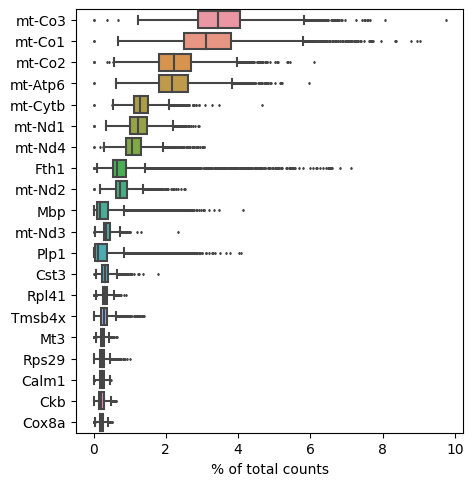

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

In an AnnData object, adata.X represents the attribute that stores the main data matrix, typically referred to as the "X" matrix. It contains the gene expression data, where each row corresponds to a cell (observation) and each column corresponds to a gene (variable). It is a sparse matrix representation of the gene expression data to efficiently handle large-scale single-cell RNA sequencing (scRNA-seq) datasets, where the majority of entries are zero. 

In [ ]:
# Convert the sparse matrix to a dense matrix
dense_matrix = adata.X.toarray()

# Print the dense matrix
print(dense_matrix)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Print all genes with non-zero expression is a given cell.

In [ ]:
cell_index = 0  # Index of the cell you want to examine

# Access the expression data for the specific cell
gene_expression = adata.X[cell_index]

# Get the indices of the genes with non-zero expression in the cell
expressed_gene_indices = gene_expression.nonzero()[1]

# Access the gene names from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

# Print the list of expressed genes in the cell
print(expressed_genes)

Index(['AC149090.1', 'mt-Cytb', 'mt-Nd5', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd3',
       'mt-Co3', 'mt-Atp6', 'mt-Atp8', 'mt-Co2',
       ...
       'Ncoa2', 'A830018L16Rik', 'Cops5', 'Snhg6', '1700034P13Rik', 'Vcpip1',
       'Adhfe1', 'Sntg1', 'Atp6v1h', 'Xkr4'],
      dtype='object', length=4678)


**Visualize the data set:** <br>
The function sc.pl.spatial() from Scanpy is used to visualize spatial transcriptomics data. It creates a spatial plot that overlays gene expression information onto the spatial coordinates of the tissue or sample.
<br>
Note that in spatial transcriptomics, multiple layers of images or data can be present. By setting img_key to "hires", we are specifying the high-resolution image layer to be visualized.

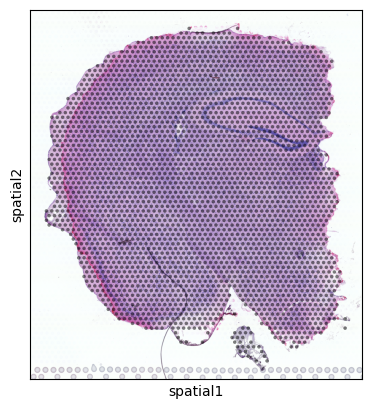

In [ ]:
sc.pl.spatial(adata, img_key="hires", alpha=0.5) #Change alpha to 0 to see the tissue sample or plot by setting color=None

Image with no overlay

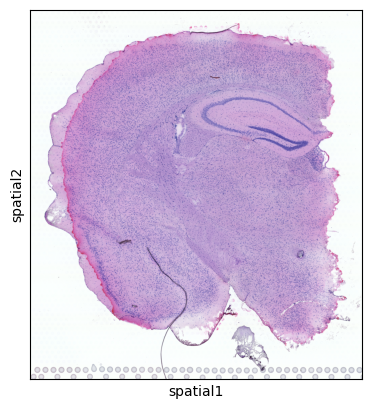

In [ ]:
sc.pl.spatial(adata, img_key="hires", color=None)

Generate a spatial plot of cells using the gene expression levels of the most abundant gene (mt-CO3) and two other genes, "Rorb" and "Vip." First verify if they are present. 

In [ ]:
gene_names = adata.var.index

In [ ]:
print("Is Rorb gene present in the vars?", "Rorb" in gene_names)
print("Is Vip gene present in the vars?", "Vip" in gene_names)

Is Rorb gene present in the vars? True
Is Vip gene present in the vars? True


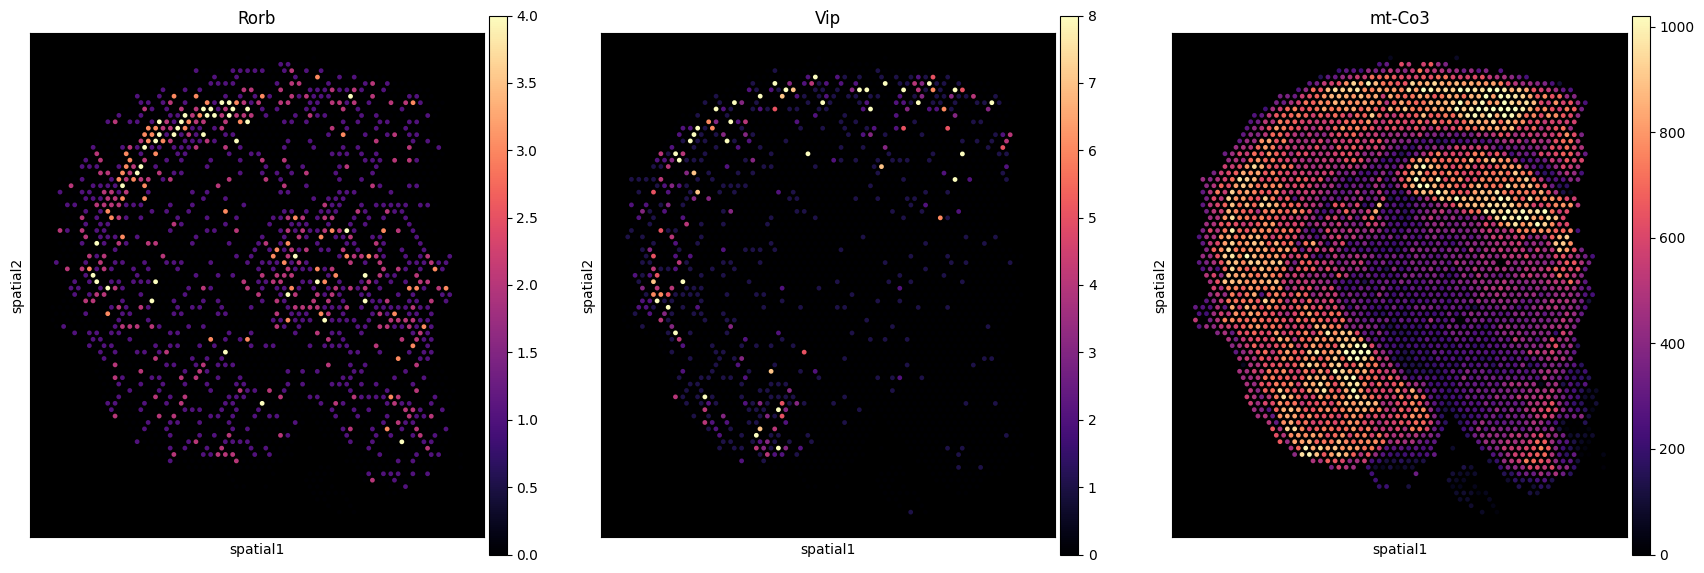

In [ ]:
with mpl.rc_context({'figure.figsize': [6,7],
                     'axes.facecolor': 'black'}):
  sc.pl.spatial(adata, color=["Rorb", "Vip", "mt-Co3"], img_key=None, size=1,
                    vmin=0, cmap='magma', vmax='p99.0',
                    gene_symbols='SYMBOL'
                  ) 

# **Prepare / cleanup the data for analysis**

Compute quality control (QC) metrics for each cell in the adata object. sc.pp.calculate_qc_metrics(adata, inplace=True) calculates various metrics that assess the quality and characteristics of the cells in the dataset.

In [ ]:
#sc.pp.calculate_qc_metrics(adata, inplace=True)

But, before you proceed with QC metrics, consider any special genes you are interested in. For example, you may be interested in mitochondrial genes. They are usually annotated as mt- (for mouse) or MT- (for human). Since our data is from mouse, let us filter the ones with lower case mt-, tag all genes as True or false based on whether they are mitochondrial and then calculate the metrics. First, let us find out if we have any such genes and how many (there are 13 mitochondrial genes in our data)

In [ ]:
adata.var[adata.var.index.str.startswith('mt-')]

gene_ids    feature_types              genome
mt-Nd1   ENSMUSG00000064341  Gene Expression  mm10-3.0.0_premrna
mt-Nd2   ENSMUSG00000064345  Gene Expression  mm10-3.0.0_premrna
mt-Co1   ENSMUSG00000064351  Gene Expression  mm10-3.0.0_premrna
mt-Co2   ENSMUSG00000064354  Gene Expression  mm10-3.0.0_premrna
mt-Atp8  ENSMUSG00000064356  Gene Expression  mm10-3.0.0_premrna
mt-Atp6  ENSMUSG00000064357  Gene Expression  mm10-3.0.0_premrna
mt-Co3   ENSMUSG00000064358  Gene Expression  mm10-3.0.0_premrna
mt-Nd3   ENSMUSG00000064360  Gene Expression  mm10-3.0.0_premrna
mt-Nd4l  ENSMUSG00000065947  Gene Expression  mm10-3.0.0_premrna
mt-Nd4   ENSMUSG00000064363  Gene Expression  mm10-3.0.0_premrna
mt-Nd5   ENSMUSG00000064367  Gene Expression  mm10-3.0.0_premrna
mt-Nd6   ENSMUSG00000064368  Gene Expression  mm10-3.0.0_premrna
mt-Cytb  ENSMUSG00000064370  Gene Expression  mm10-3.0.0_premrna

Tag all genes as True or False to be mitochondrial. 

In [ ]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")


In [ ]:
adata.var

gene_ids    feature_types              genome     mt
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna  False
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna  False
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna  False
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna  False
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna  False
...                            ...              ...                 ...    ...
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna  False
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna  False
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna  False
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna  False
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna  False

[31053 rows x 4 columns]

Simiarly you can tag them as ribosomal. Download the ribosomal genes as csv from: https://www.gsea-msigdb.org/gsea/msigdb/human/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=CSV

In [ ]:
ribo_genes = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/Transcriptomics/KEGG_RIBOSOME.v2023.1.Hs.csv', skiprows=2, header=None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

Now tag all genes as True or false for ribosomes, similar to mito. 

In [ ]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [ ]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  
Xkr4            False  False  
Gm1992          False  False  
Gm37381         False  False  
Rp1             False  False  
Sox17           False  False  
...               ...    ...  
AC168977.1      False  False  
AC149090.1      False  False  
CAAA01118383.1  False  False  
Vmn2r122        False  False  
CAAA01147332.1  False  False  

[31053 rows x 5 columns]

In [ ]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo'
    uns: 'spatial'
    obsm: 'spatial'

Calculate QC metrics and add them as new fields in the adata.obs attribute of the provided adata object. The newly added metrics provide information about the quality and characteristics of the cells based on the expression of mitochondrial and ribosomal genes. <br>
Remember that by considering specific subsets of genes, such as mitochondrial and ribosomal genes, you can evaluate additional aspects of the cell quality related to mitochondrial content and ribosomal activity, which can be indicative of cell health, RNA integrity, or potential experimental artifacts.

In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", 'ribo'], inplace=True)

Make sure that metrics are added to adata obs and var. 

In [ ]:
adata

AnnData object with n_obs × n_vars = 2987 × 31053
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

Get some basic information about the data. 

In [ ]:
number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)

Number of spots under tissue: 2987
Mean reads per spot: 15484.307
Median genes per spot: 4553.0


In [ ]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Gm1992          ENSMUSG00000089699  Gene Expression  mm10-3.0.0_premrna   
Gm37381         ENSMUSG00000102343  Gene Expression  mm10-3.0.0_premrna   
Rp1             ENSMUSG00000025900  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
AC168977.1      ENSMUSG00000079808  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   
Vmn2r122        ENSMUSG00000096730  Gene Expression  mm10-3.0.0_premrna   
CAAA01147332.1  ENSMUSG00000095742  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  n_cells_by_counts  mean_counts  \
Xkr4            False  False                672     0.275527   
Gm1992          False  False                  2     0.000670   
Gm37381         False  False                  0     0.000000   
Rp1             False  False                  8     0.002678   
Sox17           False  False                126     0.044191   
...               ...    ...                ...          ...   
AC168977.1      False  False                  0     0.000000   
AC149090.1      False  False               1524     0.933713   
CAAA01118383.1  False  False                567     0.222631   
Vmn2r122        False  False                  0     0.000000   
CAAA01147332.1  False  False                  2     0.000670   

                log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                     0.243360              77.502511         823.0   
Gm1992                   0.000669              99.933043           2.0   
Gm37381                  0.000000             100.000000           0.0   
Rp1                      0.002675              99.732173           8.0   
Sox17                    0.043243              95.781721         132.0   
...                           ...                    ...           ...   
AC168977.1               0.000000             100.000000           0.0   
AC149090.1               0.659442              48.978909        2789.0   
CAAA01118383.1           0.201005              81.017744         665.0   
Vmn2r122                 0.000000             100.000000           0.0   
CAAA01147332.1           0.000669              99.933043           2.0   

                log1p_total_counts  
Xkr4                      6.714170  
Gm1992                    1.098612  
Gm37381                   0.000000  
Rp1                       2.197225  
Sox17                     4.890349  
...                            ...  
AC168977.1                0.000000  
AC149090.1                7.933797  
CAAA01118383.1            6.501290  
Vmn2r122                  0.000000  
CAAA01147332.1            1.098612  

[31053 rows x 11 columns]

Note that many genes are showing very low n_cells_by_counts (0, 2, 8, etc.). Also notice the high pct_dropout_by_counts. The pct_dropout_by_counts metric provides a measure of the sparsity or dropout rate for each cell in the dataset. It indicates the percentage of genes with zero counts out of the total number of genes for a given cell, based on the total count of RNA molecules in that cell.

A higher pct_dropout_by_counts value for a cell suggests a higher proportion of genes with zero counts, indicating higher sparsity or dropout in that cell. Conversely, a lower pct_dropout_by_counts value indicates a lower proportion of dropout events and a denser gene expression profile for that cell.

Now, let us look at the observations (cells)

In [ ]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4678   
AAACACCAATAACTGC-1          1         59         19               3549   
AAACAGAGCGACTCCT-1          1         14         94               6779   
AAACAGCTTTCAGAAG-1          1         43          9               3108   
AAACAGGGTCTATATT-1          1         47         13               4515   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
TTGTTGTGTGTCAAGA-1          1         31         77               3464   
TTGTTTCACATCCAGG-1          1         58         42               5457   
TTGTTTCATTAGTCTA-1          1         60         30               5300   
TTGTTTCCATACAACT-1          1         45         27               5143   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.450840       14284.0            9.566965   
AAACACCAATAACTGC-1                 8.174703        9951.0            9.205529   
AAACAGAGCGACTCCT-1                 8.821732       32155.0           10.378354   
AAACAGCTTTCAGAAG-1                 8.042056        7935.0            8.979165   
AAACAGGGTCTATATT-1                 8.415382       14483.0            9.580800   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
TTGTTGTGTGTCAAGA-1                 8.150468        8785.0            9.080914   
TTGTTTCACATCCAGG-1                 8.604838       19956.0            9.901335   
TTGTTTCATTAGTCTA-1                 8.575651       18351.0            9.817493   
TTGTTTCCATACAACT-1                 8.545586       17529.0            9.771669   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   27.457295                    32.812938   
AAACACCAATAACTGC-1                   37.061602                    42.337454   
AAACAGAGCGACTCCT-1                   23.784792                    29.830508   
AAACAGCTTTCAGAAG-1                   32.917454                    39.054820   
AAACAGGGTCTATATT-1                   30.994960                    36.415107   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
TTGTTGTGTGTCAAGA-1                   27.137166                    33.249858   
TTGTTTCACATCCAGG-1                   23.872520                    29.695330   
TTGTTTCATTAGTCTA-1                   24.892376                    30.477903   
TTGTTTCCATACAACT-1                   25.415027                    31.330937   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    39.897788                    52.856343   
AAACACCAATAACTGC-1                    49.110642                    60.586876   
AAACAGAGCGACTCCT-1                    37.860364                    51.397916   
AAACAGCTTTCAGAAG-1                    46.389414                    59.206049   
AAACAGGGTCTATATT-1                    43.506180                    56.031209   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
TTGTTGTGTGTCAAGA-1                    41.343199                    55.310188   
TTGTTTCACATCCAGG-1                    37.748046                    51.638605   
TTGTTTCATTAGTCTA-1                    38.194104                    51.670209   
TTGTTTCCATACAACT-1                    39.505962                    53.191853   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           2847.0               7.954372      19.931393   
AAACACCAATAACTGC-1           2764.0               7.924796      27.776104   
AAACAGAGCGACTCCT-

*italicized text*
*   Plot a histogram of the total_counts column from the adata.obs dataframe.
*   Plot a histogram of the n_genes_by_counts column 





<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

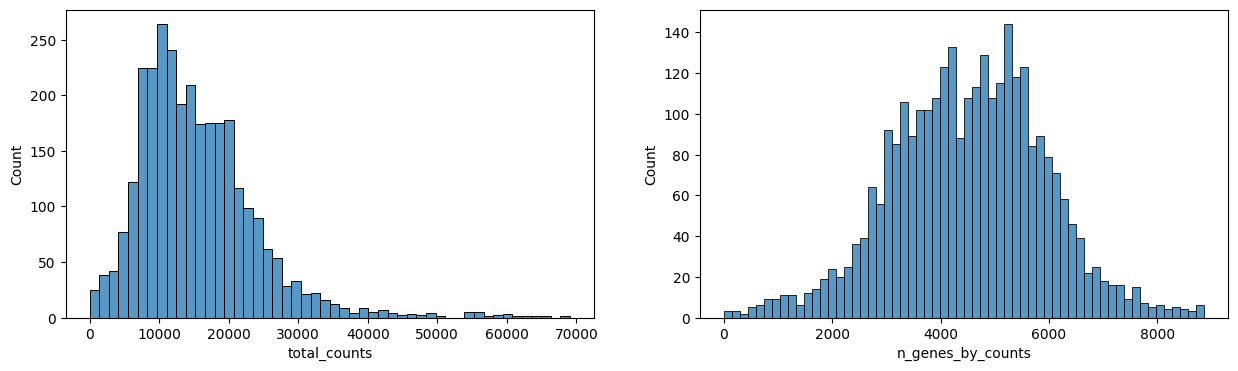

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])


**Filtering**

Let us have a look at the cells and how many genes and total_counts in each cell. Based on this information we can filter them out. For example, filter all cells showing very low or very high counts or the ones found with only a few genes. We can also filter cells based on percent counts mitochondria and/or ribosomes. 

In [ ]:
adata.obs.sort_values('total_counts')

in_tissue  array_row  array_col  n_genes_by_counts  \
CACAGTCCCGCTTCGC-1          1         60        112                  3   
AGCGATGCGCCTAATA-1          1         64        108                 38   
AGATACCAATAGAACC-1          1         64        110                 66   
GGAGTTGATTCTGTGT-1          1         68        112                179   
AGAAGAGCGCCGTTCC-1          1         38         88                238   
...                       ...        ...        ...                ...   
CTGACTGCGCAGCTCG-1          1         31        101               8821   
TGGCCAAACTGAAGTA-1          1         28         76               8444   
CTAACGAAACTTGCTG-1          1         30         94               8861   
TTGTTCAGTGTGCTAC-1          1         24         64               8457   
CATGGTCTAGATACCG-1          1         26         66               8574   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
CACAGTCCCGCTTCGC-1                 1.386294           3.0            1.386294   
AGCGATGCGCCTAATA-1                 3.663562          43.0            3.784190   
AGATACCAATAGAACC-1                 4.204693          73.0            4.304065   
GGAGTTGATTCTGTGT-1                 5.192957         226.0            5.424950   
AGAAGAGCGCCGTTCC-1                 5.476464         295.0            5.690360   
...                                     ...           ...                 ...   
CTGACTGCGCAGCTCG-1                 9.085004       61512.0           11.027004   
TGGCCAAACTGAAGTA-1                 9.041330       62504.0           11.043002   
CTAACGAAACTTGCTG-1                 9.089528       63739.0           11.062568   
TTGTTCAGTGTGCTAC-1                 9.042868       65866.0           11.095393   
CATGGTCTAGATACCG-1                 9.056606       69102.0           11.143353   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CACAGTCCCGCTTCGC-1                  100.000000                   100.000000   
AGCGATGCGCCTAATA-1                  100.000000                   100.000000   
AGATACCAATAGAACC-1                   78.082192                   100.000000   
GGAGTTGATTCTGTGT-1                   42.920354                    65.044248   
AGAAGAGCGCCGTTCC-1                   36.271186                    53.220339   
...                                        ...                          ...   
CTGACTGCGCAGCTCG-1                   17.407985                    23.345038   
TGGCCAAACTGAAGTA-1                   19.035582                    25.241585   
CTAACGAAACTTGCTG-1                   17.661087                    23.684087   
TTGTTCAGTGTGCTAC-1                   17.673762                    24.381320   
CATGGTCTAGATACCG-1                   18.657926                    25.209111   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
CACAGTCCCGCTTCGC-1                   100.000000                   100.000000   
AGCGATGCGCCTAATA-1                   100.000000                   100.000000   
AGATACCAATAGAACC-1                   100.000000                   100.000000   
GGAGTTGATTCTGTGT-1                   100.000000                   100.000000   
AGAAGAGCGCCGTTCC-1                    87.118644                   100.000000   
...                                         ...                          ...   
CTGACTGCGCAGCTCG-1                    31.385746                    45.608987   
TGGCCAAACTGAAGTA-1                    33.629848                    48.248112   
CTAACGAAACTTGCTG-1                    31.945904                    45.893409   
TTGTTCAGTGTGCTAC-1                    33.152157                    48.190265   
CATGGTCTAGATACCG-1                    33.799311                    48.848080   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
CACAGTCCCGCTTCGC-1              0.0               0.000000       0.000000   
AGCGATGCGCCTAATA-1              5.0               1.791759      11.627908   
AGATACCAATAGAACC-

We have many cells with 0 total_counts and very large number of counts - these may indicate low quality or have little biological relevance. <br> Let us plot some QC metrics and try to understand the filter settigns. 


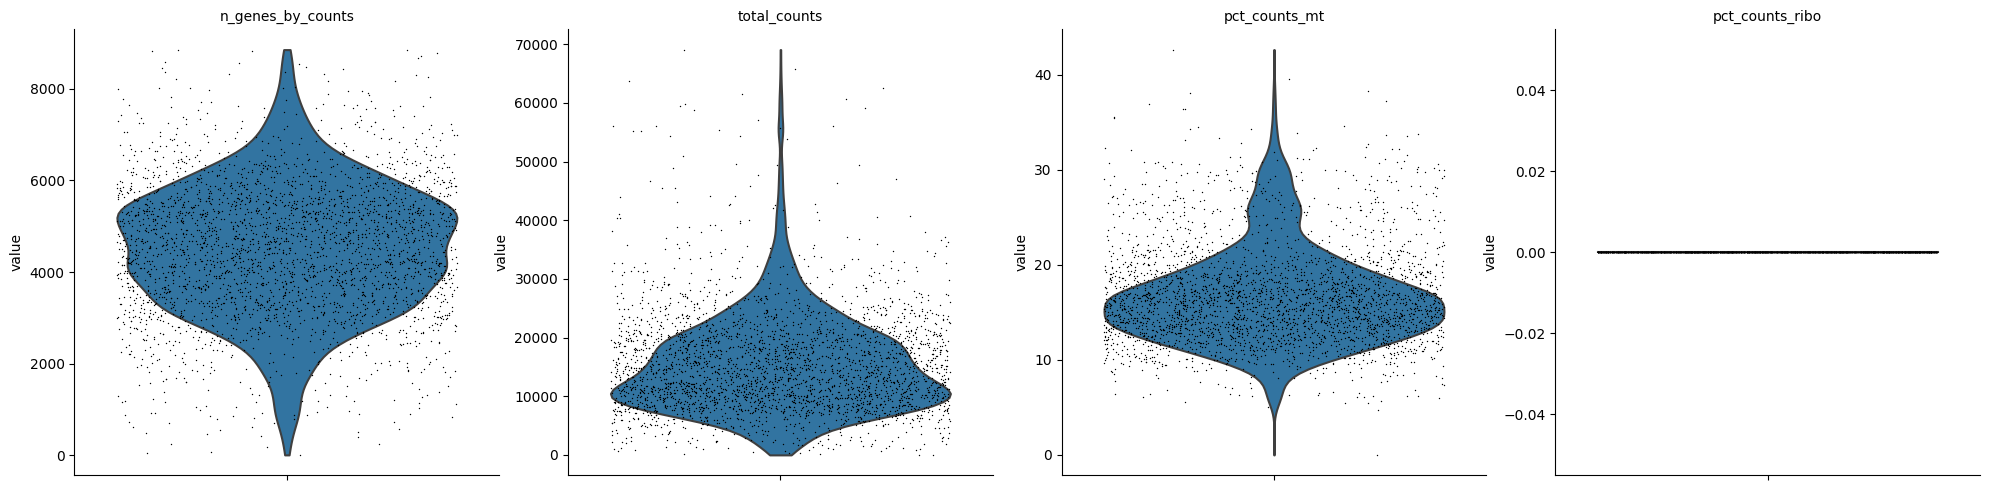

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

Let us filter all cells with less than 5000 and more than 35000 counts. Also, retain only cells with 20% percentage of mitochondrial gene counts. Based on the plot, we do not have high percentage of of ribosomal gene counts, but let us add a filter for the sake of completeness. 

In [ ]:

sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]  
adata = adata[adata.obs["pct_counts_ribo"] < 2]


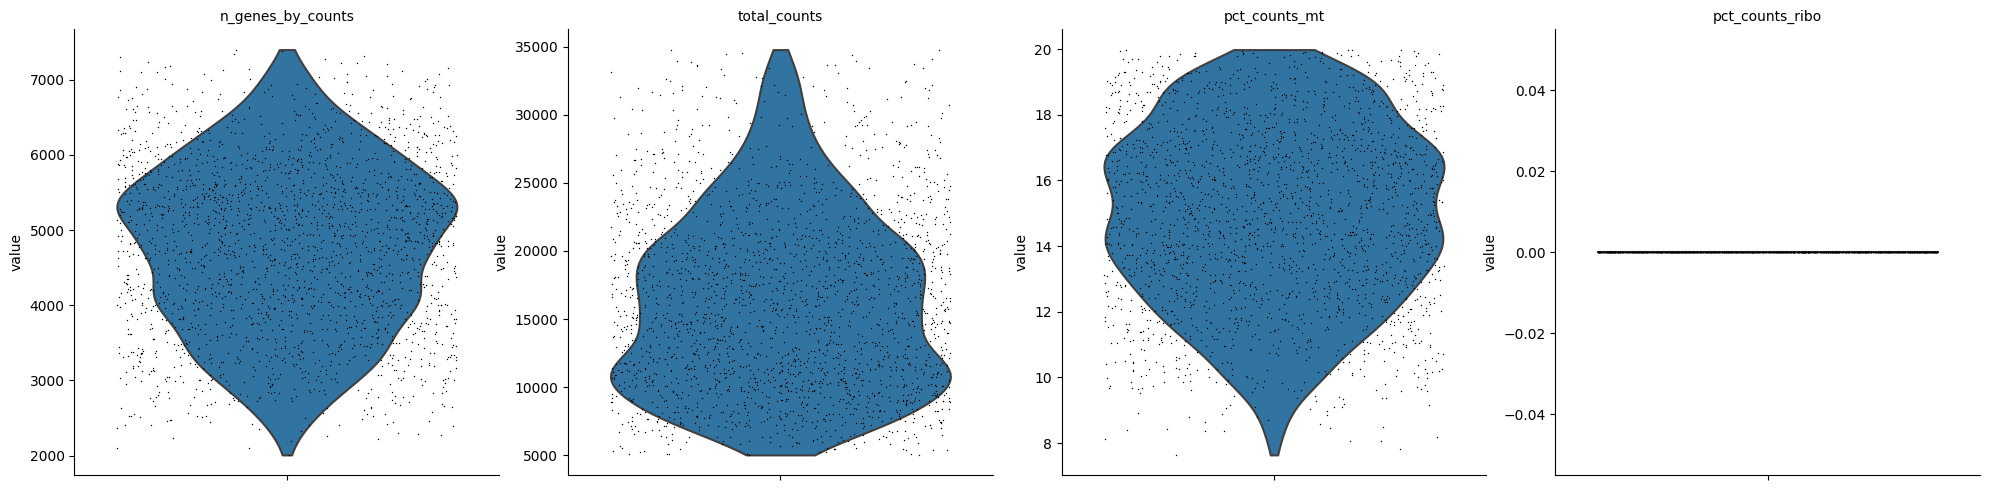

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)


Let us also remove genes that are expressed in fewer cells than the specified min_cells value. Here, genes expressed in fewer than 10 cells will be filtered out.

In [ ]:
sc.pp.filter_genes(adata, min_cells=10) #Filter genes based on minimum number of cells. 

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


#**Now that our data is cleaned up, let us start the analysis.**

Pre-processing: normalize and log transform <br>


*   Perform total-count normalization on the expression data of the AnnData object. Scale the expression values of each cell so that the total counts of all genes in a cell are equal. Basically, we are doing this as each cell has different number of total counts. 
*   Apply a logarithmic transformation to the expression data. The transformation helps stabilize the variance and normalize the data distribution, commonly used for scRNA-seq data.





In [ ]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
Mrpl15          ENSMUSG00000033845  Gene Expression  mm10-3.0.0_premrna   
Gm37988         ENSMUSG00000104217  Gene Expression  mm10-3.0.0_premrna   
Tcea1           ENSMUSG00000033813  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
Vamp7           ENSMUSG00000051412  Gene Expression  mm10-3.0.0_premrna   
Spry3           ENSMUSG00000061654  Gene Expression  mm10-3.0.0_premrna   
Tmlhe           ENSMUSG00000079834  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  n_cells_by_counts  mean_counts  \
Xkr4            False  False                672     0.275527   
Sox17           False  False                126     0.044191   
Mrpl15          False  False               1555     0.839973   
Gm37988         False  False                 67     0.023770   
Tcea1           False  False               1284     0.640442   
...               ...    ...                ...          ...   
Vamp7           False  False               1051     0.467359   
Spry3           False  False                327     0.123535   
Tmlhe           False  False                 55     0.019083   
AC149090.1      False  False               1524     0.933713   
CAAA01118383.1  False  False                567     0.222631   

                log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                     0.243360              77.502511         823.0   
Sox17                    0.043243              95.781721         132.0   
Mrpl15                   0.609751              47.941078        2509.0   
Gm37988                  0.023492              97.756947          71.0   
Tcea1                    0.494966              57.013726        1913.0   
...                           ...                    ...           ...   
Vamp7                    0.383464              64.814195        1396.0   
Spry3                    0.116480              89.052561         369.0   
Tmlhe                    0.018903              98.158688          57.0   
AC149090.1               0.659442              48.978909        2789.0   
CAAA01118383.1           0.201005              81.017744         665.0   

                log1p_total_counts  n_cells  
Xkr4                      6.714170      531  
Sox17                     4.890349       99  
Mrpl15                    7.828038     1256  
Gm37988                   4.276666       54  
Tcea1                     7.556951     1033  
...                            ...      ...  
Vamp7                     7.242083      851  
Spry3                     5.913503      259  
Tmlhe                     4.060443       41  
AC149090.1                7.933797     1234  
CAAA01118383.1            6.501290      467  

[16679 rows x 12 columns]

Let us find the gene with most counts and plot it before and after normalization

In [ ]:
# Sum the gene expression counts across cells
gene_counts_sum = np.sum(adata.X, axis=0)
# Find the gene with the highest sum
gene_with_most_counts = adata.var_names[np.argmax(gene_counts_sum)]
print("Gene with the most counts:", gene_with_most_counts)

Gene with the most counts: mt-Co3


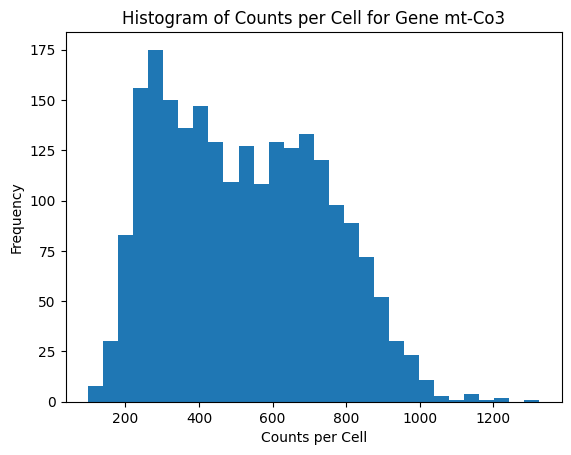

In [ ]:
# Specify the gene name
gene_name = 'mt-Co3'

# Get the index of the gene in adata.var_names
gene_index = list(adata.var_names).index(gene_name)

# Extract the gene expression counts for the gene
gene_counts = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_array = gene_counts.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_array, bins=30)
plt.title(f"Histogram of Counts per Cell for Gene {gene_name}")
plt.xlabel("Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)

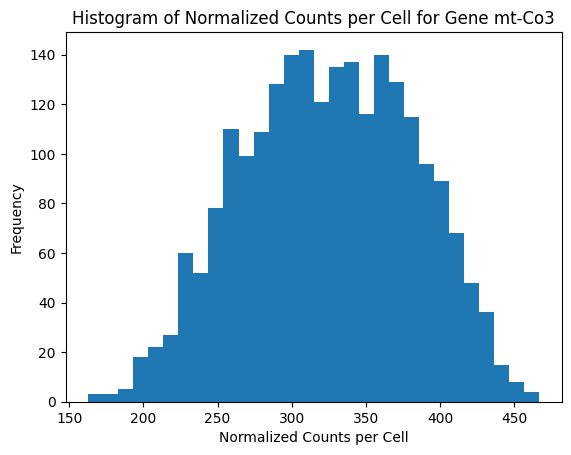

In [ ]:
# Get the normalized gene expression counts for the gene
gene_counts_normalized = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_normalized_array = gene_counts_normalized.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_normalized_array, bins=30)
plt.title(f"Histogram of Normalized Counts per Cell for Gene {gene_name}")
plt.xlabel("Normalized Counts per Cell")
plt.ylabel("Frequency")
plt.show()

In [ ]:
sc.pp.log1p(adata)

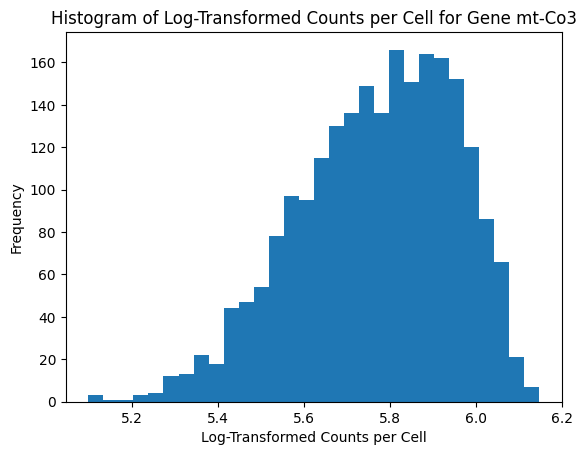

In [ ]:
# Get the log-transformed gene expression counts for the gene
gene_counts_log_transformed = adata.X[:, gene_index]

# Convert sparse matrix to array
gene_counts_log_transformed_array = gene_counts_log_transformed.toarray().flatten()

# Plot the histogram
plt.hist(gene_counts_log_transformed_array, bins=30)
plt.title(f"Histogram of Log-Transformed Counts per Cell for Gene {gene_name}")
plt.xlabel("Log-Transformed Counts per Cell")
plt.ylabel("Frequency")
plt.show()

Now the count values are within a small range (instead of orders of magnitude). 

# **Identify highly-variable genes**

Identifying highly variable genes is an important step in the analysis of single-cell RNA sequencing (scRNA-seq) data. It helps in identifying genes that exhibit significant variation in expression across cells, which can be indicative of biological heterogeneity, cell type-specific markers, or genes involved in key regulatory processes.

Cell type identification: Highly variable genes often show differential expression patterns between different cell types. By identifying these genes, you can uncover gene signatures that define specific cell types and use them as markers for cell type identification.

Dimensionality reduction: scRNA-seq datasets can have thousands of genes, but not all of them contribute significantly to the underlying biological variation. Identifying highly variable genes allows you to focus on the most informative genes, reducing the dimensionality of the dataset and improving downstream analyses such as clustering and visualization.

Differential expression analysis: Highly variable genes are more likely to exhibit significant differences in expression between experimental conditions or cell states. By identifying these genes, you can prioritize them for further investigation and identify genes that drive biological differences.

Biological insights: Highly variable genes often include genes associated with critical biological processes, including cell cycle regulation, signaling pathways, and key transcription factors. Identifying these genes can provide insights into the underlying biology and regulatory networks driving cellular heterogeneity.

You can identify highly variable genes in the dataset using sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000) function. The flavor parameter determines the method used for identifying highly variable genes, with "seurat" indicating the use of the Seurat algorithm. The n_top_genes parameter specifies the maximum number of highly variable genes to retain, with the top 2000 genes selected in this case. <br>
In summary, we will be identifying the top 2000 highly variable genes in our data. 



In [ ]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

Notice that a new column labeled highly_variable is added to the daraframe with True or false in addition to columns with some stats (means, dispersions, diseprsions_norm)

In [ ]:
adata.var

gene_ids    feature_types              genome  \
Xkr4            ENSMUSG00000051951  Gene Expression  mm10-3.0.0_premrna   
Sox17           ENSMUSG00000025902  Gene Expression  mm10-3.0.0_premrna   
Mrpl15          ENSMUSG00000033845  Gene Expression  mm10-3.0.0_premrna   
Gm37988         ENSMUSG00000104217  Gene Expression  mm10-3.0.0_premrna   
Tcea1           ENSMUSG00000033813  Gene Expression  mm10-3.0.0_premrna   
...                            ...              ...                 ...   
Vamp7           ENSMUSG00000051412  Gene Expression  mm10-3.0.0_premrna   
Spry3           ENSMUSG00000061654  Gene Expression  mm10-3.0.0_premrna   
Tmlhe           ENSMUSG00000079834  Gene Expression  mm10-3.0.0_premrna   
AC149090.1      ENSMUSG00000095041  Gene Expression  mm10-3.0.0_premrna   
CAAA01118383.1  ENSMUSG00000063897  Gene Expression  mm10-3.0.0_premrna   

                   mt   ribo  n_cells_by_counts  mean_counts  \
Xkr4            False  False                672     0.275527   
Sox17           False  False                126     0.044191   
Mrpl15          False  False               1555     0.839973   
Gm37988         False  False                 67     0.023770   
Tcea1           False  False               1284     0.640442   
...               ...    ...                ...          ...   
Vamp7           False  False               1051     0.467359   
Spry3           False  False                327     0.123535   
Tmlhe           False  False                 55     0.019083   
AC149090.1      False  False               1524     0.933713   
CAAA01118383.1  False  False                567     0.222631   

                log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                     0.243360              77.502511         823.0   
Sox17                    0.043243              95.781721         132.0   
Mrpl15                   0.609751              47.941078        2509.0   
Gm37988                  0.023492              97.756947          71.0   
Tcea1                    0.494966              57.013726        1913.0   
...                           ...                    ...           ...   
Vamp7                    0.383464              64.814195        1396.0   
Spry3                    0.116480              89.052561         369.0   
Tmlhe                    0.018903              98.158688          57.0   
AC149090.1               0.659442              48.978909        2789.0   
CAAA01118383.1           0.201005              81.017744         665.0   

                log1p_total_counts  n_cells  highly_variable     means  \
Xkr4                      6.714170      531             True  0.180298   
Sox17                     4.890349       99            False  0.030764   
Mrpl15                    7.828038     1256            False  0.437216   
Gm37988                   4.276666       54            False  0.015004   
Tcea1                     7.556951     1033            False  0.339228   
...                            ...      ...              ...       ...   
Vamp7                     7.242083      851            False  0.268316   
Spry3                     5.913503      259            False  0.072066   
Tmlhe                     4.060443       41            False  0.012032   
AC149090.1                7.933797     1234            False  0.441945   
CAAA01118383.1            6.501290      467            False  0.142973   

                dispersions  dispersions_norm  
Xkr4               0.046898          1.311122  
Sox17             -0.166906          0.258982  
Mrpl15            -0.317163         -0.629049  
Gm37988           -0.309664         -0.443534  
Tcea1             -0.306766         -0.584437  
...                     ...               ...  
Vamp7             -0.258572         -0.192110  
Spry3             -0.337245         -0.579263  
Tmlhe             -0.265446         -0.225937  
AC149090.1        -0.263117         -0.397153  
CAAA01118383.1    -0.196528          0.113211  

[

Let us create a plot showing the gene expression dispersion and mean relationship for genes, highlighting those genes that exhibit higher variability across cells.

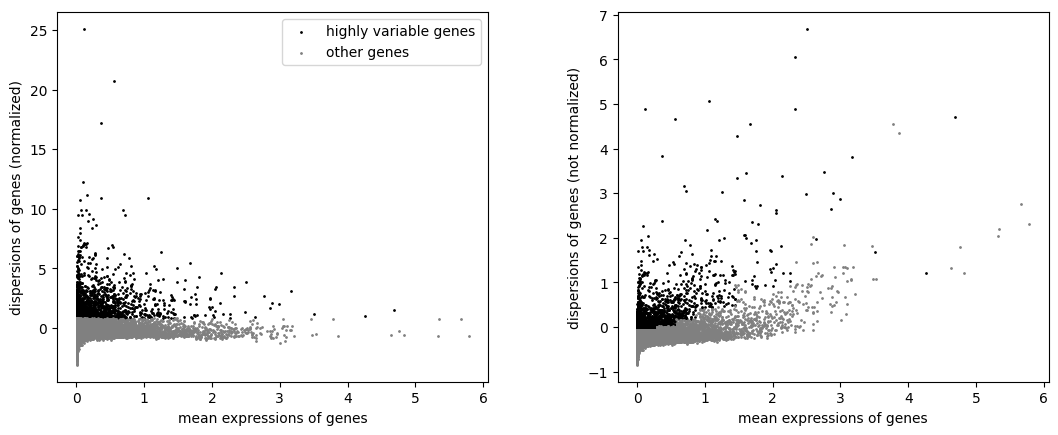

In [ ]:
sc.pl.highly_variable_genes(adata)

**Dimensionality reduction:** <br>
Now, we can just work with these top 2000 highly_variable genes. <br>
We can use PCA to further reduce dimensions. 

In [ ]:
adata = adata[:, adata.var.highly_variable]

  **sc.pp.pca(adata):** This function performs principal component analysis (PCA) on the gene expression data in the AnnData object (adata). PCA is a dimensionality reduction technique that transforms the data into a set of orthogonal components capturing the most significant variation in the dataset. The transformed PCA components are added to the adata object.

In [ ]:
sc.pp.pca(adata) #By default calculates 30 PCAs

Let us plot the contribution of each of these principal components. 

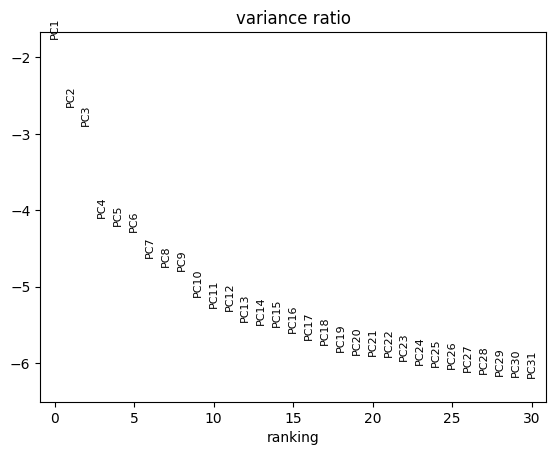

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

We can just use the significant ones - top 20 in our case as it seems to saturate after that. Let us use the top 20 to calculate our neighbors. <br>
**sc.pp.neighbors(adata):** This function computes the neighborhood relationships between cells in the dataset using the gene expression data. It identifies the nearest neighbors of each cell based on their gene expression profiles. The neighbor information is stored in the adata object.

In [ ]:
sc.pp.neighbors(adata, n_pcs=20)

Let us further reduce the dimensionality to 2. <p>
*   **sc.tl.umap(adata):** This function performs Uniform Manifold Approximation and Projection (UMAP) on the data. UMAP is a dimensionality reduction technique that preserves both local and global structure of the data, aiming to visualize the data in a lower-dimensional space while maintaining its manifold structure. The UMAP coordinates are added to the adata object.
<p> You can reduce it to 3 dimensions instead of 2 and perform clustering using k-means or other clustering algorithms. 

In [ ]:
sc.tl.umap(adata, n_components=2)

Plot the umap components to visualize the data. This data needs to be clustered into various clusters. 

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


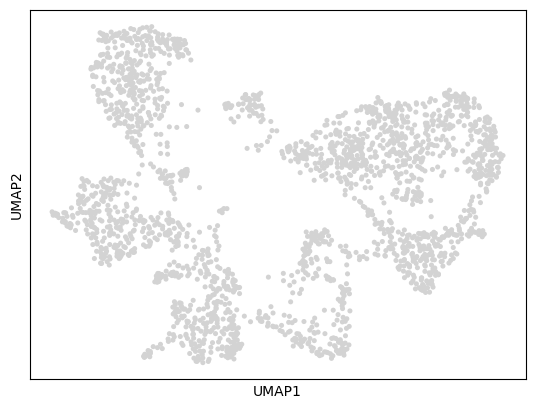

In [ ]:
sc.pl.umap(adata)

Let us visualize results for a few selected Genes. First, let's have a quick look at the gene names and pick the ones that showed up in large number of cells. 

In [ ]:
sorted_by_num_cells = adata.var['n_cells_by_counts'].sort_values(ascending=False)
sorted_by_num_cells


Gm42418    2985
Cst3       2985
mt-Nd2     2984
Fth1       2982
Malat1     2962
           ... 
Gm816        11
Stmnd1       11
Sec14l4      11
Calcb        10
Gm13822      10
Name: n_cells_by_counts, Length: 2000, dtype: int64

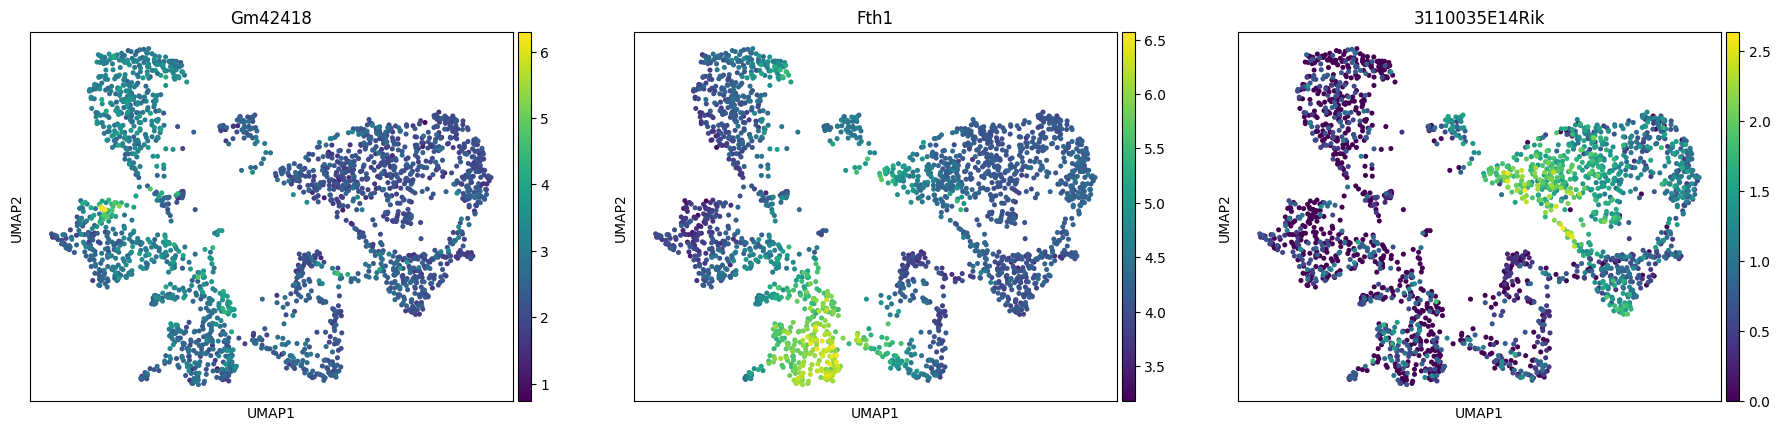

In [ ]:
sc.pl.umap(adata, color=["Gm42418", "Fth1", "3110035E14Rik"])

**We are ready to perform clustering**

The library "leidenalg" is a Python library that provides an implementation of the Leiden algorithm for community detection in networks. The Leiden algorithm is a popular method for detecting communities or clusters within a network, often applied in the field of network analysis and graph-based data analysis.

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.3 MB/s eta 0:00:00



*   **sc.tl.leiden(adata, key_added="clusters"):** This function applies the Leiden algorithm for community detection on the preprocessed data. It identifies clusters of cells based on the neighborhood information previously computed. The resulting clusters are assigned as annotations and added to the adata object with the key name "clusters".





The resolution parameter determines the granularity of the clustering. Higher values of resolution result in more clusters, while lower values result in fewer clusters.

In [ ]:
sc.tl.leiden(adata, resolution=0.6, key_added="clusters") #Experiment with values 0.3, 0.6, and 1.0. View the result in the UMAP plot below. 

A new column (last one) gets added to obs with the cluster label. 

In [ ]:
adata.obs

Create a UMAP plot of cells with color-coded annotations. <br>
Plot, "total_counts" (total gene counts per cell), "n_genes_by_counts" (number of detected genes per cell), and "clusters" (cell cluster assignments).

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


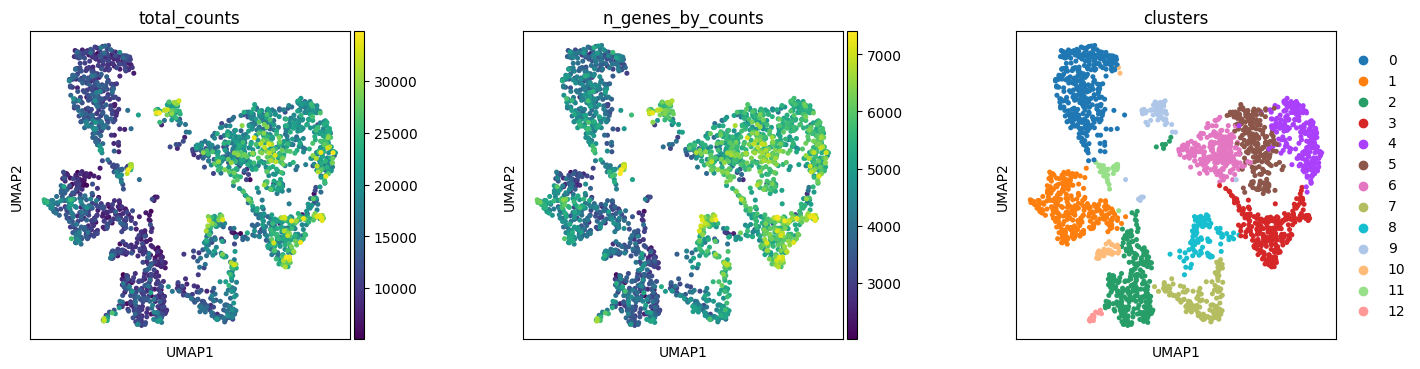

In [ ]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

Create a spatial plot of cells with color-coded annotations for "total_counts" (total gene counts per cell) and "n_genes_by_counts" (number of detected genes per cell).

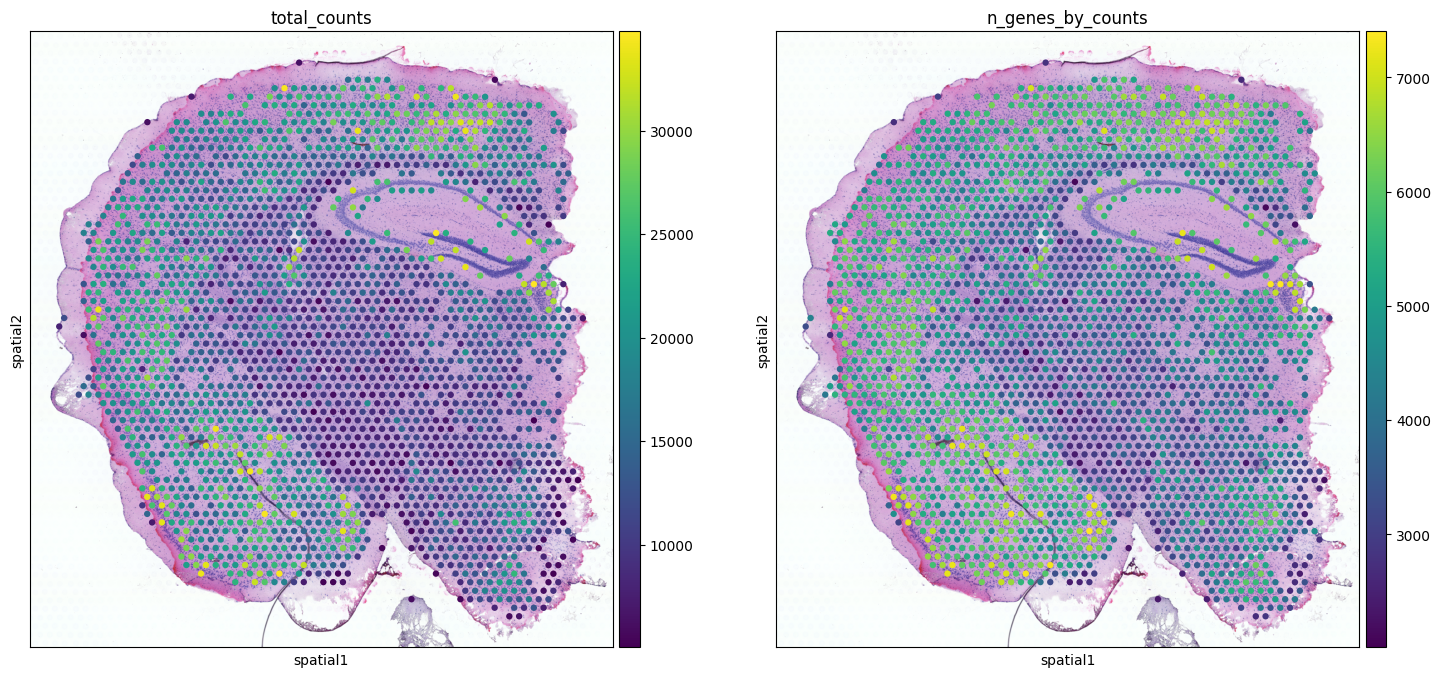

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

Create a spatial plot of cells with color-coded annotations for clusters. The colors represent different clusters or groups of cells that have been identified through the clustering algorithm.
<br>
When performing clustering analysis on spatial transcriptomics data, the goal is to identify distinct groups or populations of cells based on their gene expression profiles. The clustering algorithm assigns each cell to a specific cluster based on similarity in gene expression patterns. Each cluster is then assigned a unique identifier or label. <br>

In the plot, the different colors indicate the assigned clusters, allowing you to visually distinguish and observe the spatial distribution of different cell populations within the tissue. Cells belonging to the same cluster are more similar to each other in terms of their gene expression profiles, while cells in different clusters may exhibit different gene expression patterns.

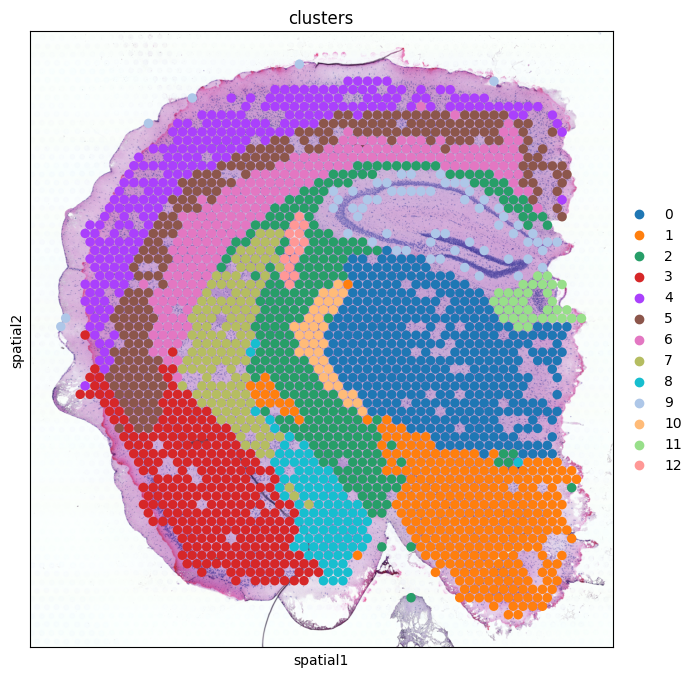

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

==========================================================

**Side note:** You can crop the data to focus on a smaller region. First find out the min and max values for the x and y coordinates. 

In [ ]:

xmin = adata.obsm['spatial'][:, 0].min()
xmax = adata.obsm['spatial'][:, 0].max()
ymin = adata.obsm['spatial'][:, 1].min()
ymax = adata.obsm['spatial'][:, 1].max()

print("x-coordinate range:", xmin, "to", xmax)
print("y-coordinate range:", ymin, "to", ymax)


Now crop the data

In [ ]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "2","5"], crop_coord=[3000, 10000, 5000, 10000], alpha=0.4, size=1.3)  #coord = [xmin, xmax, ymin, ymax]
# To Visualize the underlying image set alpha=0


==============================================================================

# **Find marker genes**

Marker genes are genes that are known to be expressed in specific cell types or conditions. These genes serve as indicators or markers that help identify and characterize particular cell types or states.
<p>
We have 10 clusters right now and let us find the markers for these clusters. A gene marker analysis begins with ranking genes in each cluster according to how different they are relative to other clusters.

*   **sc.tl.rank_genes_groups(adata, "clusters", method="t-test"):** This function performs differential gene expression analysis between different clusters defined by the "clusters" column in the adata.obs dataframe. It compares the gene expression profiles between the clusters using a statistical test, such as the t-test, to identify genes that are differentially expressed between the clusters. The results of the analysis are stored in the adata object.

In [ ]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")  #Group by clusters and perform differential gene expression analysis using t-tets (also try 'wilcoxon')


*   **sc.pl.rank_genes_groups(adata, n_genes=10):** This function creates plot used to visualize the results of gene ranking after performing differential expression analysis between groups of cells. It provides insights into the genes that are differentially expressed and potentially associated with specific groups or conditions in your dataset.

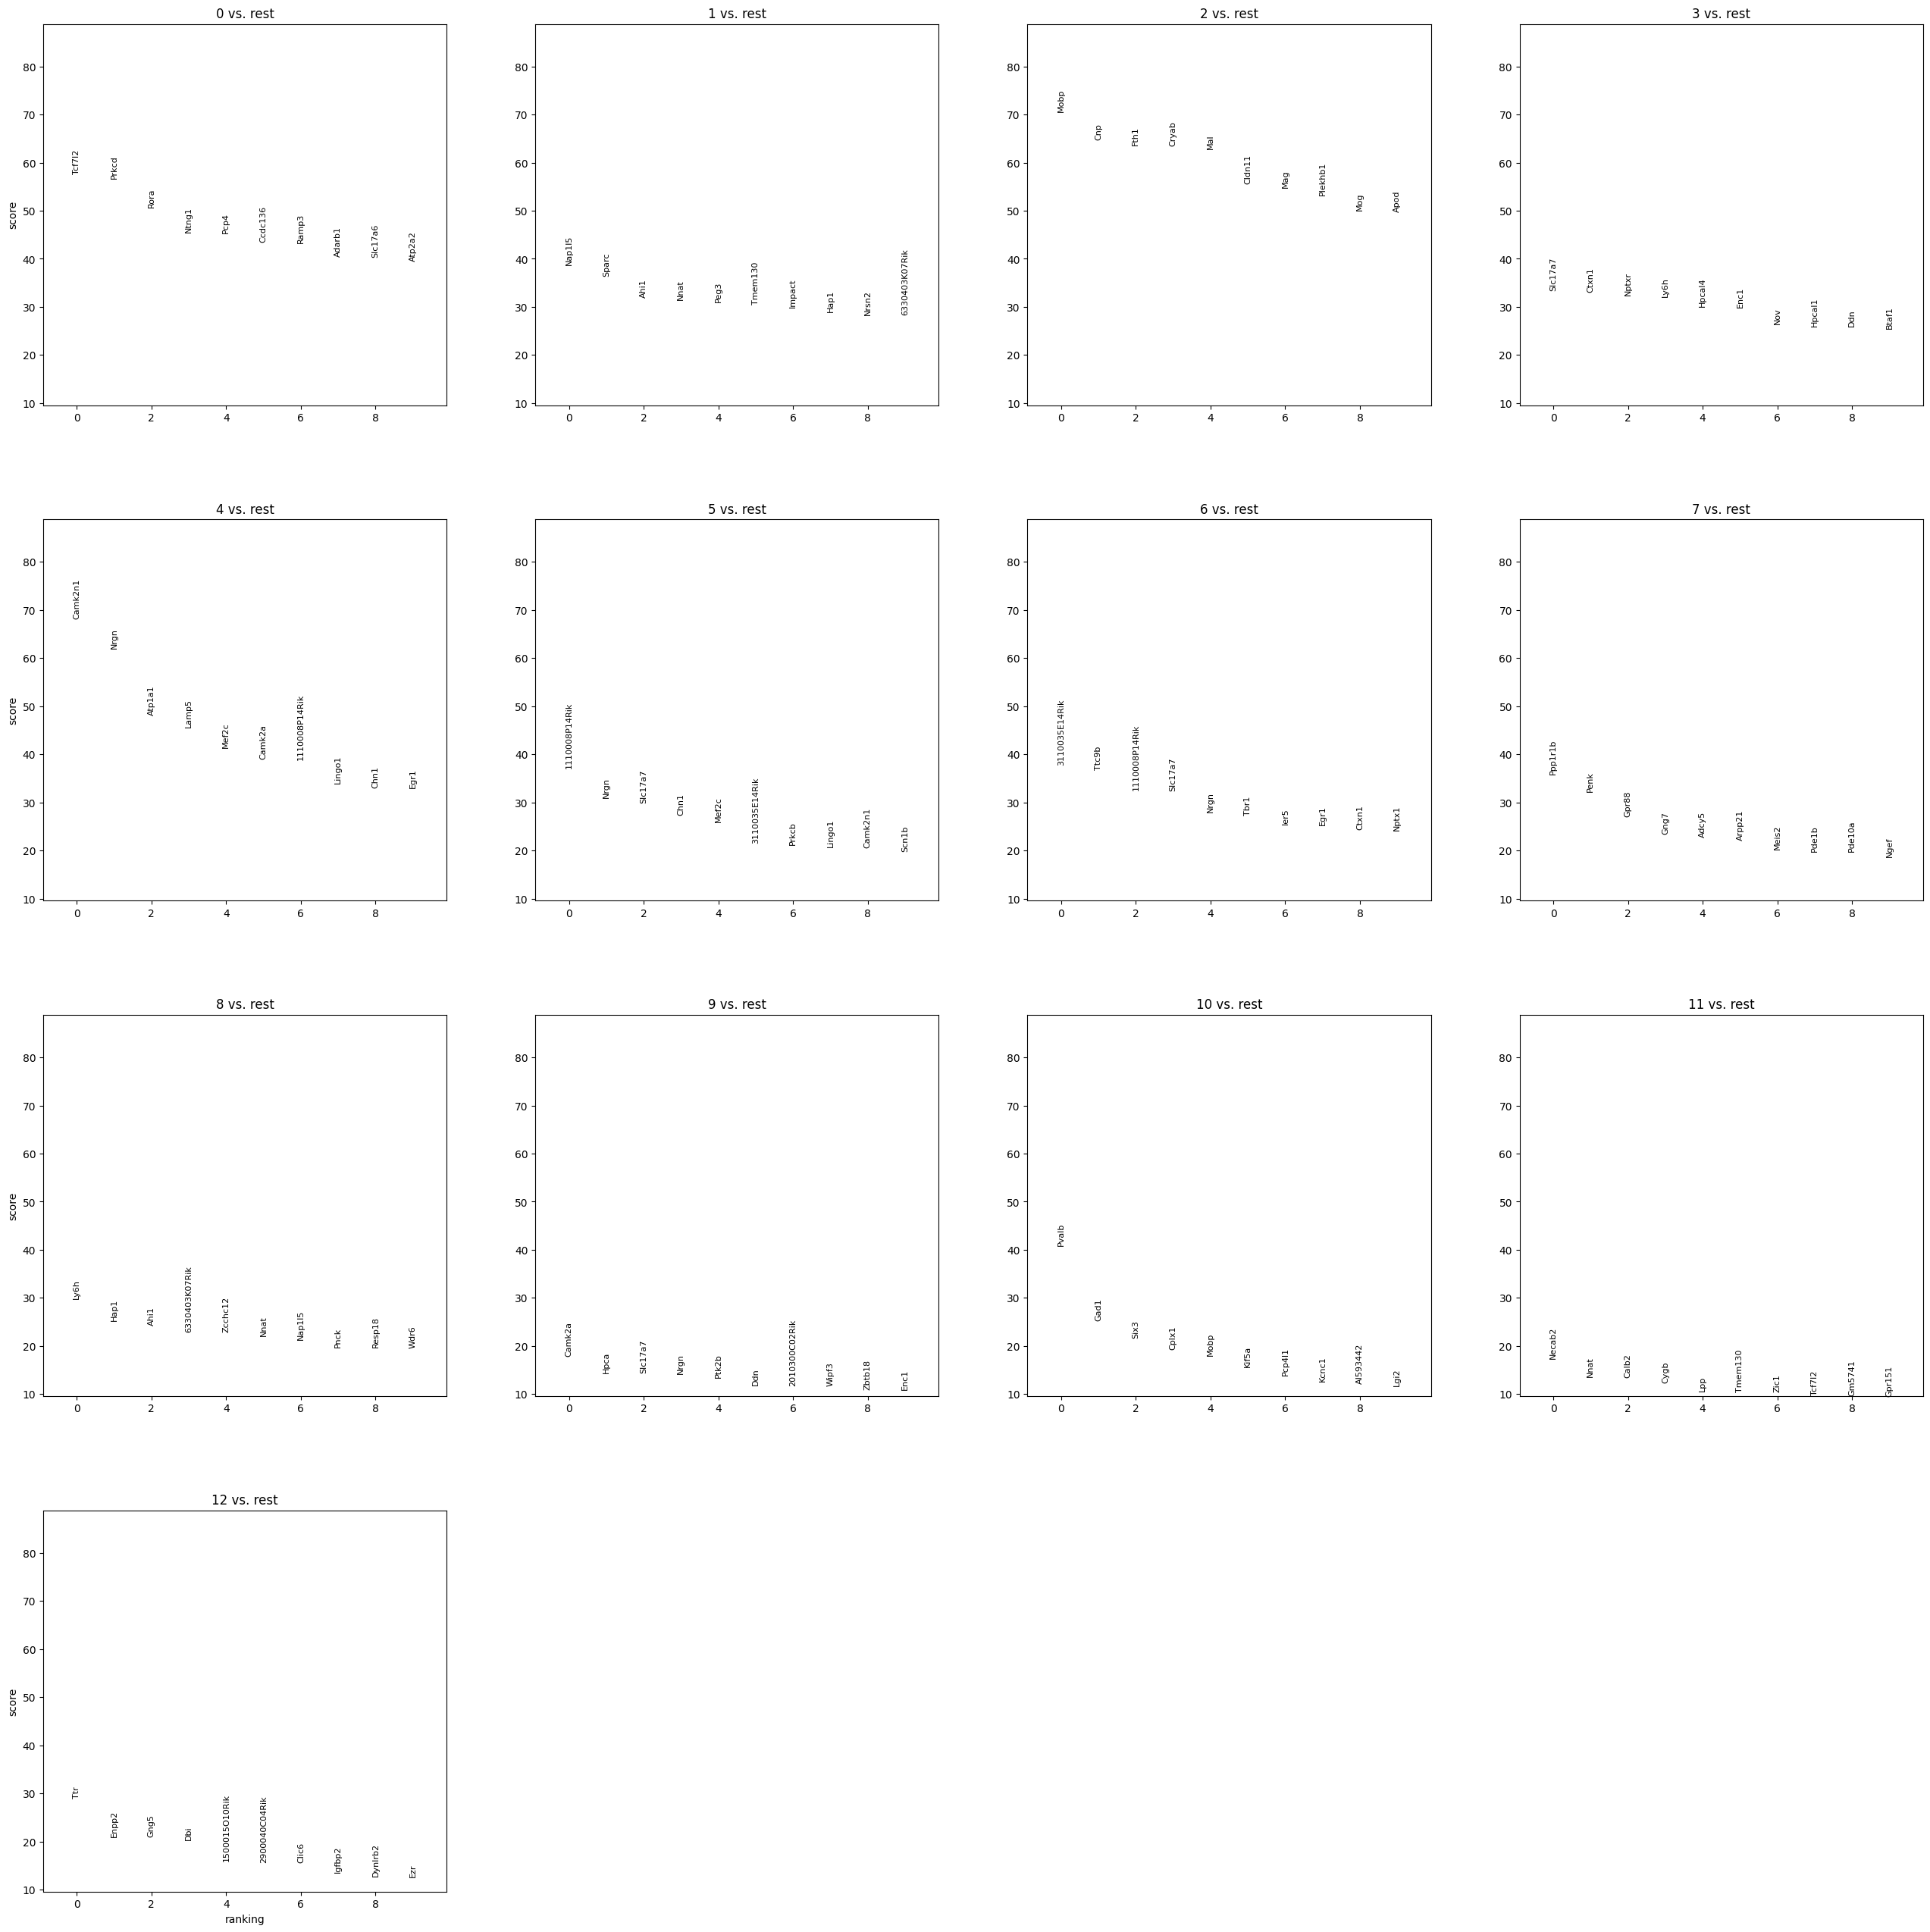

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=10)



*   **sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters"):** This function creates a heatmap visualization of the top differentially expressed genes associated with a specific cluster/group ("4" in this case) from the results of the differential gene expression analysis.



categories: 0, 1, 2, etc.
var_group_labels: 6


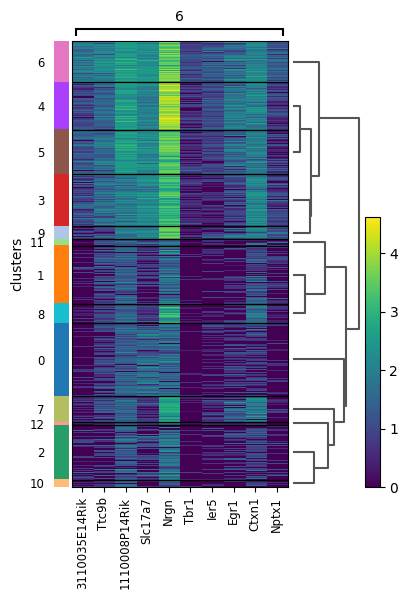

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, groups="6", n_genes=10, groupby="clusters")

The gene Nrgn seems to exhibit a gene expression pattern that reflects the spatial organization or structure of the tissue or sample (appears brighter). Let us map it. 

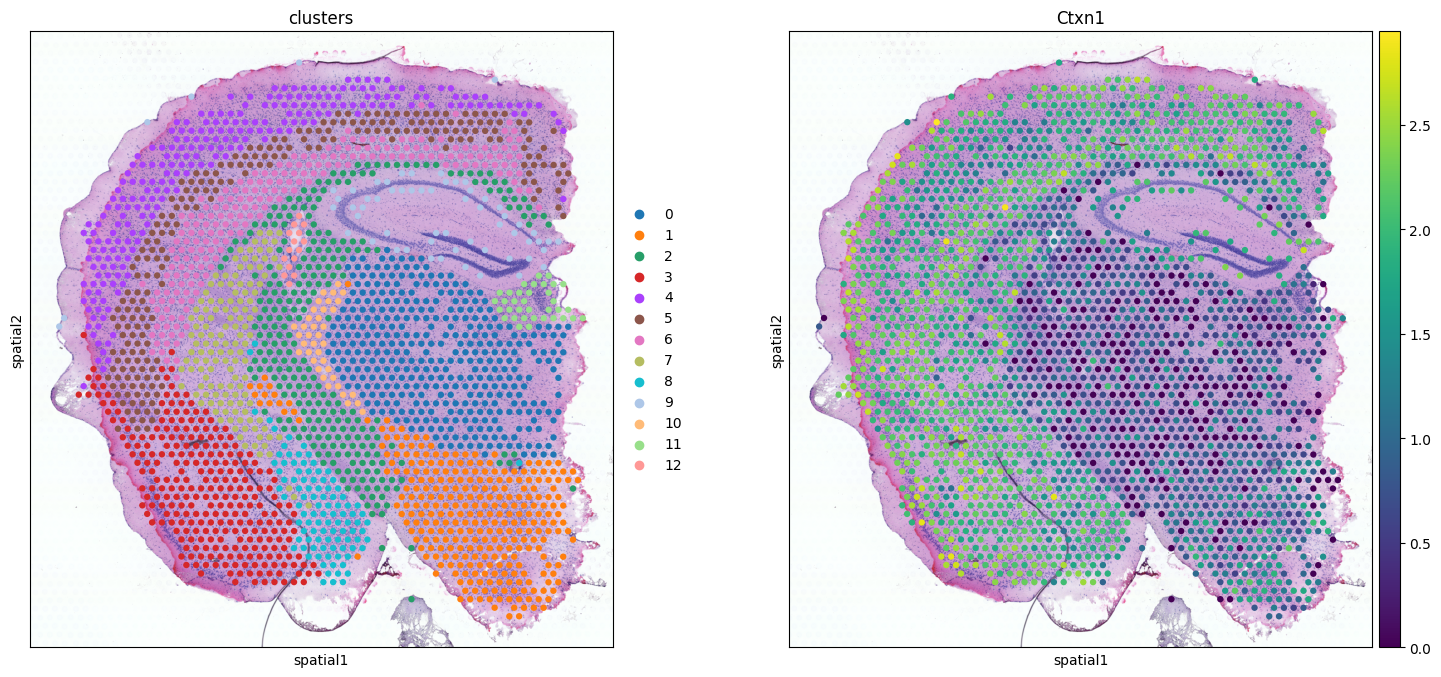

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["clusters", "Ctxn1"])

This information can be used to properly understand the clusters and name them accordingly (e.g., Endothelial cells, neuronal cells, plasma cells, fibroblasts, etc.)

# Print the top n genes per cluster. <br>
After running the analysis, the results are stored in the adata.uns["rank_genes_groups"] attribute. Let us save it as result and the result["names"] field contains the names of the top features for each cluster.

In [ ]:
# Obtain the top features for each cluster
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]  

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
Tcf7l2
Prkcd
Rora
Ntng1
Pcp4
Ccdc136
Ramp3
Adarb1
Slc17a6
Atp2a2

Cluster 1 top features:
Nap1l5
Sparc
Ahi1
Nnat
Peg3
Tmem130
Impact
Hap1
Nrsn2
6330403K07Rik

Cluster 2 top features:
Mobp
Cnp
Fth1
Cryab
Mal
Cldn11
Mag
Plekhb1
Mog
Apod

Cluster 3 top features:
Slc17a7
Ctxn1
Nptxr
Ly6h
Hpcal4
Enc1
Nov
Hpcal1
Ddn
Btaf1

Cluster 4 top features:
Camk2n1
Nrgn
Atp1a1
Lamp5
Mef2c
Camk2a
1110008P14Rik
Lingo1
Chn1
Egr1

Cluster 5 top features:
1110008P14Rik
Nrgn
Slc17a7
Chn1
Mef2c
3110035E14Rik
Prkcb
Lingo1
Camk2n1
Scn1b

Cluster 6 top features:
3110035E14Rik
Ttc9b
1110008P14Rik
Slc17a7
Nrgn
Tbr1
Ier5
Egr1
Ctxn1
Nptx1

Cluster 7 top features:
Ppp1r1b
Penk
Gpr88
Gng7
Adcy5
Arpp21
Meis2
Pde1b
Pde10a
Ngef

Cluster 8 top features:
Ly6h
Hap1
Ahi1
6330403K07Rik
Zcchc12
Nnat
Nap1l5
Pnck
Resp18
Wdr6

Cluster 9 top features:
Camk2a
Hpca
Slc17a7
Nrgn
Ptk2b
Ddn
2010300C02Rik
Wipf3
Zbtb18
Enc1

Cluster 10 top features:
Pvalb
Gad1
Six3
Cplx1
Mobp
Kif5a
Pcp4l1
Kcnc1
AI593442
Lgi2

Clus

In [ ]:
# Access the marker genes results from rank_genes_groups
marker_genes = adata.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

These genes can be matched against cell type database to identify the specific cell type each cluster represents. For example, Ppp1r1b is dominant in cluster 6. https://www.proteinatlas.org/ENSG00000131771-PPP1R1B

# **Other useful libraries**

### **A note about squidpy**
Squidpy is a Python library developed by the same team behind Scanpy, and it is designed specifically for the analysis of spatial transcriptomics data. While Scanpy focuses on the analysis of single-cell RNA sequencing (scRNA-seq) data, Squidpy extends the functionality to incorporate spatial information and provides tools for spatial analysis and visualization.

Here are some key features and functionalities of Squidpy:

Integration of spatial data: Squidpy allows you to integrate and analyze spatial transcriptomics data generated by techniques such as Visium, Slide-seq, and MERFISH. It provides functions to handle spatially resolved gene expression data and combine it with other spatial information like cell coordinates or tissue morphology.

Spatial analysis: Squidpy offers a range of spatial analysis methods to explore and interpret spatial transcriptomics data. It includes functions for spatially resolved differential expression analysis, spatial autocorrelation analysis, and spatially constrained clustering.

Spatial visualization: Squidpy provides visualization tools tailored for spatial transcriptomics data. It enables the visualization of spatial gene expression patterns on tissue sections, the overlay of different layers of spatial information, and the generation of spatially resolved heatmaps, scatter plots, and interactive visualizations.

Integration with Scanpy: Squidpy is built on top of Scanpy, allowing for seamless integration with Scanpy's functionality. This enables users to combine single-cell RNA sequencing data and spatial transcriptomics data in a unified analysis framework.

The main difference between Scanpy and Squidpy is the focus of their analysis. Scanpy is primarily designed for scRNA-seq data analysis, while Squidpy is specifically developed for the analysis of spatial transcriptomics data. Squidpy provides specialized methods and visualization tools tailored to spatial transcriptomics data, taking into account the spatial context and allowing for deeper insights into spatial gene expression patterns and interactions within the tissue.

### **A note about cell2location for spatial mapping**
<br> https://cell2location.readthedocs.io/
<br> 
The cell2location package is a Python library that enables spatial mapping and deconvolution of cell type-specific gene expression patterns in spatial transcriptomics data. It provides a computational framework for estimating the contribution of different cell types to the observed gene expression signals at spatial locations within a tissue.

The main goal of the cell2location package is to infer the spatial distribution and abundance of distinct cell types based on their gene expression profiles. It integrates single-cell transcriptomics data, spatial transcriptomics data, and cell type reference expression profiles to deconvolve the cellular composition and map the spatial organization of cell types within a tissue sample.

The key features and functionalities of cell2location include:

Deconvolution of spatial transcriptomics data: Estimating the contribution of different cell types to the observed gene expression patterns in spatially resolved datasets.
Cell type annotation: Assigning cell types to spatial locations based on their gene expression profiles.
Visualization of spatial cell type patterns: Generating spatial maps that depict the distribution of different cell types within the tissue.
Probabilistic modeling: Incorporating uncertainty and variability in the estimation of cell type-specific expression patterns and spatial cell type distributions.
Integration with other data modalities: Integrating spatial transcriptomics data with other omics data, such as single-cell RNA sequencing data or imaging data.

In general, the required input data for cell2location includes:

Spatial transcriptomics data: This data captures the spatially resolved gene expression patterns within a tissue. It typically consists of information about the expression levels of genes across spatial locations or spots on a tissue section. The data can be obtained from technologies such as Visium, Slide-seq, or MERFISH.

Single-cell RNA sequencing (scRNA-seq) data: scRNA-seq data is used to provide reference expression profiles for different cell types. These reference profiles serve as a basis for deconvolving the cell type-specific contributions to the spatial transcriptomics data. The scRNA-seq data should cover a wide range of cell types present in the tissue being studied.

Spatial coordinates: Information about the spatial coordinates or locations of the spots or regions in the tissue is necessary to map the gene expression data onto the tissue architecture. The spatial coordinates help establish the spatial context for the analysis.

The combination of spatial transcriptomics data, scRNA-seq data, and spatial coordinates enables cell2location to estimate the spatial distribution and abundance of different cell types within the tissue.

While Visium data alone can be sufficient for cell2location, incorporating scRNA-seq data to provide cell type references improves the accuracy and robustness of the analysis. By utilizing both types of data, cell2location can better deconvolve the cell type-specific expression patterns and provide more reliable estimates of the spatial cell type distributions.

It's important to note that cell2location assumes that cell type-specific gene expression patterns are conserved between scRNA-seq and spatial transcriptomics datasets. Therefore, the accuracy of the analysis relies on the quality of the scRNA-seq data and its representation of the cell types present in the spatial transcriptomics data.

# **A note about scvi**
https://scvi-tools.org/

The scvi-tools library is a comprehensive toolkit for single-cell RNA sequencing (scRNA-seq) analysis, specifically designed for probabilistic modeling and deep learning-based methods. It provides a collection of powerful tools and models for various scRNA-seq analysis tasks, including differential expression analysis, dimensionality reduction, cell type annotation, trajectory inference, and more.

Some key features and functionalities of scvi-tools include:

Probabilistic modeling: scvi-tools leverages probabilistic modeling techniques, such as variational autoencoders (VAEs) and Gaussian mixture models (GMMs), to model the underlying gene expression distribution in scRNA-seq data.

Deep learning-based methods: The library incorporates deep learning techniques to learn low-dimensional representations of scRNA-seq data, allowing for effective visualization, clustering, and identification of cell types.

Inference of latent variables: scvi-tools provides methods to infer latent variables, such as cell type labels or gene expression profiles, which can be useful for understanding cellular heterogeneity and identifying different cell populations.

Integration of multi-modal data: The library supports the integration of multiple modalities, such as gene expression and chromatin accessibility, enabling multi-omic analysis of scRNA-seq data.

User-friendly interface: scvi-tools offers a user-friendly API that integrates with the popular scanpy framework, allowing users to seamlessly incorporate scVI models and methods into their existing scRNA-seq workflows.